In [45]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# hyper parameters
input_size = 1
output_size = 1
num_epochs = 600
learning_rate = 0.001


In [46]:
x_train = np.array([3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167,
                    7.042, 10.791, 5.313, 7.997, 3.1], dtype=np.float32)

y_train = np.array([1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221,
                    2.827, 3.465, 1.65, 2.904, 1.3], dtype=np.float32)

# nn.Linearへの入力は(N, *, in_features)のためreshape
x_train = x_train.reshape(15, 1)
y_train = y_train.reshape(15, 1)


In [47]:
# nn.Moduleを継承したクラスを作成
class LinearRegression(nn.Module):

    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        out = self.linear(x)
        return out

model = LinearRegression(input_size, output_size)

# loss and Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),
                            lr=learning_rate)


In [48]:
for epoch in range(num_epochs):
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    # 各エポックで勾配をクリアすること！
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    # パラメータ更新
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print('Epoch [%d/%d], Loss: %.4f' % (epoch+1, num_epochs, loss.item()))

# save the model
# torch.save(model.state_dict(), 'model.pkl')


Epoch [10/600], Loss: 1.5470
Epoch [20/600], Loss: 0.4679
Epoch [30/600], Loss: 0.2904
Epoch [40/600], Loss: 0.2609
Epoch [50/600], Loss: 0.2557
Epoch [60/600], Loss: 0.2545
Epoch [70/600], Loss: 0.2539
Epoch [80/600], Loss: 0.2534
Epoch [90/600], Loss: 0.2530
Epoch [100/600], Loss: 0.2526
Epoch [110/600], Loss: 0.2521
Epoch [120/600], Loss: 0.2517
Epoch [130/600], Loss: 0.2513
Epoch [140/600], Loss: 0.2509
Epoch [150/600], Loss: 0.2505
Epoch [160/600], Loss: 0.2500
Epoch [170/600], Loss: 0.2496
Epoch [180/600], Loss: 0.2492
Epoch [190/600], Loss: 0.2488
Epoch [200/600], Loss: 0.2484
Epoch [210/600], Loss: 0.2480
Epoch [220/600], Loss: 0.2476
Epoch [230/600], Loss: 0.2472
Epoch [240/600], Loss: 0.2468
Epoch [250/600], Loss: 0.2464
Epoch [260/600], Loss: 0.2460
Epoch [270/600], Loss: 0.2456
Epoch [280/600], Loss: 0.2452
Epoch [290/600], Loss: 0.2448
Epoch [300/600], Loss: 0.2444
Epoch [310/600], Loss: 0.2440
Epoch [320/600], Loss: 0.2436
Epoch [330/600], Loss: 0.2433
Epoch [340/600], Lo

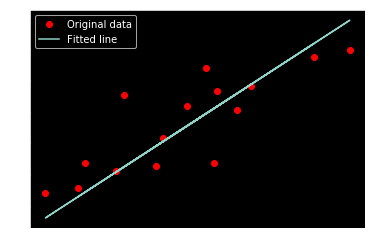

In [49]:
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()